In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle as pkl
from sklearn.metrics import precision_recall_curve, accuracy_score,f1_score, precision_score, roc_auc_score, roc_curve, recall_score,average_precision_score

# Figure 2a

(array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

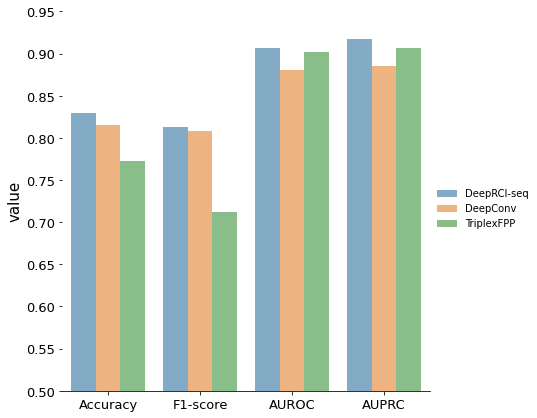

In [2]:
figure2a = pkl.load(open('result/figure2a.bin','rb'))
m= ['Accuracy','Accuracy','Accuracy','F1-score','F1-score','F1-score', 'AUROC','AUROC','AUROC','AUPRC','AUPRC','AUPRC',]
v = [0.83,0.815, 0.772,\
     0.8128, 0.808,0.711656,\
     0.906,0.88, 0.902,\
     0.917, 0.885, 0.9065,]
data = {
    'metrics':m,
    'value':v,
    'model':['DeepRCI-seq','DeepConv','TriplexFPP', 'DeepRCI-seq','DeepConv','TriplexFPP','DeepRCI-seq','DeepConv','TriplexFPP','DeepRCI-seq','DeepConv','TriplexFPP']
}
data = pd.DataFrame(data)
data.head()

g = sns.catplot(
    data=data, kind="bar",
    x="metrics", y="value", hue="model",
    ci="sd", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "value",fontsize=15)
g.legend.set_title("")
g.set(ylim=(0.5, 0.95))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#g.savefig('result/baseline_1.pdf')
#g.savefig('result/baseline_1.png')

# Figure 2b

(array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

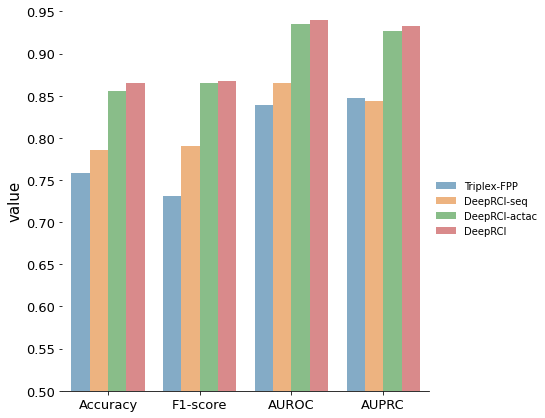

In [3]:
[baseline_pred, baseline_test] = pkl.load(open('result/baseline_seq.bin','rb'))
[deepCRI_only_seq_pred, deepCRI_only_seq_test] = pkl.load(open('result/deepCRI_only_seq.bin','rb'))
[deepCRI_seq_atac_pred, deepCRI_seq_atac_test] = pkl.load(open('result/deepCRI_seq_atac.bin','rb'))
[deepCRI_seq_all_pred, deepCRI_seq_all_test] = pkl.load(open('result/deepCRI_seq_all.bin','rb'))

def get_metrics(preds, labels):
    acc = accuracy_score(labels, preds>0.5)
    sn = precision_score(labels, preds>0.5)
    sp = recall_score(labels, preds>0.5)
    auroc = roc_auc_score(labels, preds)
    auprc = average_precision_score(labels, preds)
    f1 = f1_score(labels, preds>0.5)
    return [acc, f1, auroc, auprc]

result1 = get_metrics(deepCRI_only_seq_pred, deepCRI_only_seq_test)
result2 = get_metrics(deepCRI_seq_atac_pred, deepCRI_seq_atac_test)
result3 = get_metrics(deepCRI_seq_all_pred, deepCRI_seq_all_test)
result4 = get_metrics(baseline_pred, baseline_test)
data = {'model':['Triplex-FPP','DeepRCI-seq','DeepRCI-actac','DeepRCI']*4,
        "value":np.vstack([result4, result1, result2, result3]).T.reshape(-1),
        'metrics':['Accuracy',]*4+['F1-score',]*4 + ['AUROC',]*4+['AUPRC',]*4
       }
data = pd.DataFrame(data)
#data = pd.DataFrame(data)
data.head()

g = sns.catplot(
    data=data, kind="bar",
    x="metrics", y="value", hue="model",
    ci="sd", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "value",fontsize=15)
g.legend.set_title("")
g.set(ylim=(0.5, 0.95))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#g.savefig('result/second_dataset.pdf')

# Figure 3a

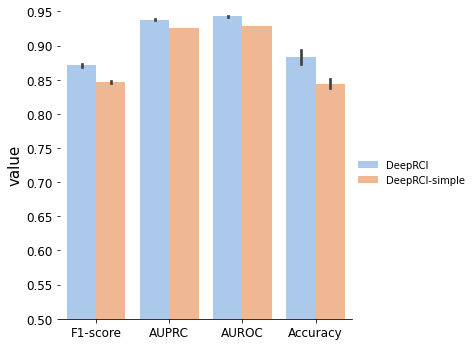

In [4]:
# Bayesian
x = pkl.load(open('result/figure3a_bayesian_balance.bin','rb'))
y = pkl.load(open('result/figure3a_bayesian_balance_y.bin','rb'))
# simple

data = {}

data['value'] = list(x[:,-1]) + list(y[:,-1]) + list(x[:,-2]) + list(y[:,-2])+ list(x[:,-3]) + list(y[:,-3])+ list(x[:,-4]) + list(y[:,-4])
data[''] = ['DeepRCI',]*len(x[:,-1]) + ['DeepRCI-simple',]*len(y[:,-1]) + ['DeepRCI',]*len(x[:,-1]) + ['DeepRCI-simple',]*len(y[:,-1]) + ['DeepRCI',]*len(x[:,-1]) + ['DeepRCI-simple',]*len(y[:,-1]) + ['DeepRCI',]*len(x[:,-1]) + ['DeepRCI-simple',]*len(y[:,-1])
data['metrics'] = ['F1-score',] * (len(x[:,-1])*2) + ['AUPRC',] * (len(x[:,-1])*2) + ['AUROC',] * (len(x[:,-1])*2) + ['Accuracy',] * (len(x[:,-1])*2)
data = pd.DataFrame(data)
sns.color_palette("husl", 9)
g = sns.catplot(
    data=data, kind="bar",
    x="metrics", y="value", hue="",
    palette='pastel'
)
g.set_axis_labels("", "value",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
g.set(xlabel=None)
g.despine(left=True)
g.set(ylim=(0.5,0.95))
#g.savefig('result/Bayesian_setting.pdf')
#g.savefig('result/Bayesian_setting.png')

# Figure 3b

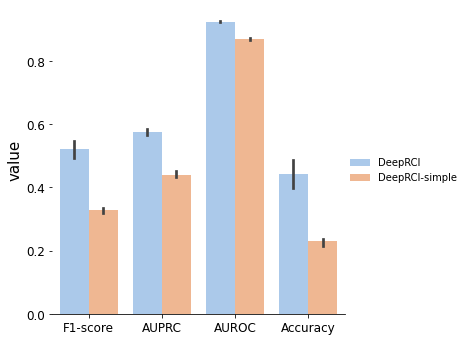

In [5]:
y = np.array(y)


x = pkl.load(open('result/figure3a_bayesian_imbalance.bin','rb'))
y = pkl.load(open('result/figure3a_bayesian_imbalance_y.bin','rb'))

data = {}

data['value'] = list(x[:,-1]) + list(y[:,-1]) + list(x[:,-2]) + list(y[:,-2])+ list(x[:,-3]) + list(y[:,-3])+ list(x[:,-4]) + list(y[:,-4])
data[''] = ['DeepRCI',]*len(x[:,-1]) + ['DeepRCI-simple',]*len(y[:,-1]) + ['DeepRCI',]*len(x[:,-1]) + ['DeepRCI-simple',]*len(y[:,-1]) + ['DeepRCI',]*len(x[:,-1]) + ['DeepRCI-simple',]*len(y[:,-1]) + ['DeepRCI',]*len(x[:,-1]) + ['DeepRCI-simple',]*len(y[:,-1])
data['metrics'] = ['F1-score',] * (len(x[:,-1])*2) + ['AUPRC',] * (len(x[:,-1])*2) + ['AUROC',] * (len(x[:,-1])*2) + ['Accuracy',] * (len(x[:,-1])*2)

data = pd.DataFrame(data)

sns.color_palette("husl", 9)
g = sns.catplot(
    data=data, kind="bar",
    x="metrics", y="value", hue="",
    palette='pastel'
)
g.set_axis_labels("", "value",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
g.set(xlabel=None)
g.despine(left=True)
#plt.legend(["DeepRCI","DeepRCI-simple"])
#g.set(ylim=(0.5,0.95))
#g.savefig('result/Bayesian_setting_imbalance.pdf')
#g.savefig('result/Bayesian_setting_imbalance.png')

# Figure 3c

In [6]:
resolution = int(1e6)
name2idx = pkl.load(open(f'result/name2idx_{resolution}.bin','rb'))
ref_file='gencode.v38.chr_patch_hapl_scaff.annotation.gff3'

In [7]:
chr2anno = {}
import re
with open(ref_file) as fp:
    for line in fp:
        if line.startswith('#'):
            continue
        line = line.split()
        if line[2]=='transcript':
            chrs = line[0]
            start = int(line[3])
            end = int(line[4])
            #mid = (start+end)//2
            #pos = int(mid // resolution + 1)
            
            #name = f'{chrs}_{pos:04d}'
            anno = re.findall(r'transcript_type=(\w*);',line[-1])[0]
            #print(anno)
            #break
            if chrs not in chr2anno:
                chr2anno[chrs] = []
            chr2anno[chrs].append([start,end,anno])

In [8]:
annos = []
with open(f'data/GSM4006840_HUVEC_control_iMARGI_inter_1000000_sampled.seqs') as fp:
    for line in fp:
        line = line.split()
        chrs = 'chr'+line[2]
        start = int(line[3])
        end = int(line[4])
        mid = (start + end)//2
        anno = None
        for value in chr2anno[chrs]:
            if mid <=value[1] and mid>=value[0]:
                anno = value[2]
                break
        annos.append(anno)

In [9]:
pos_annos = annos

In [10]:
neg_annos = []
with open(f'data/GSM4006840_HUVEC_control_iMARGI_inter_1000000_neg_sampled.seqs') as fp:
    for line in fp:
        line = line.split()
        chrs = 'chr'+line[2]
        start = int(line[3])
        end = int(line[4])
        mid = (start + end)//2
        anno = None
        for value in chr2anno[chrs]:
            if mid <=value[1] and mid>=value[0]:
                anno = value[2]
                break
        neg_annos.append(anno)

In [11]:
def get_result(pos_pred, neg_pred):
    lnc_pred,lnc_label = [],[]
    mrna_pred, mrna_label = [],[]
    other_pre, other_label = [], []

    for index, value in enumerate(pos_annos):
        if value == 'lncRNA':
            lnc_pred.append(pos_pred[index])
            lnc_label.append(1)
        else:
            if value == 'protein_coding':
                mrna_pred.append(pos_pred[index])
                mrna_label.append(1)
            else:
                if value==None:
                    continue
                else:
                    other_pre.append(pos_pred[index])
                    other_label.append(1)
    for index, value in enumerate(neg_annos):
        if value == 'lncRNA':
            lnc_pred.append(neg_pred[index])
            lnc_label.append(0)
        else:
            if value == 'protein_coding':
                mrna_pred.append(neg_pred[index])
                mrna_label.append(0)
            else:
                if value == None:
                    continue
                else:
                    other_pre.append(neg_pred[index])
                    other_label.append(0)
    auc1 = roc_auc_score(lnc_label, lnc_pred)
    auc2 = roc_auc_score(mrna_label, mrna_pred)
    auc3 = roc_auc_score(other_label, other_pre)
    
    
    ap1 = average_precision_score(lnc_label, lnc_pred)
    ap2 = average_precision_score(mrna_label, mrna_pred)
    ap3 = average_precision_score(other_label, other_pre)

    return [auc1, auc2, auc3,], [ap1, ap2,ap3]

In [12]:
data = {'the type of RNA':[],'AUROC':[],'':[]}

In [13]:
for r in range(10):
    pos_pred = pkl.load(open(f'result/sampled_pos_{r}.bin','rb'))
    neg_pred = pkl.load(open(f'result/sampled_neg_{r}.bin','rb'))
    auc, ap = get_result(pos_pred, neg_pred)
    
    data['the type of RNA'].extend(['lncRNA','mRNA','other'])
    data['AUROC'].extend(ap)
    data[''].extend(['DeepRCI',]*3)
    
for r in range(10):
    pos_pred = pkl.load(open(f'result/only_seq_sampled_pos_{r}.bin','rb'))
    neg_pred = pkl.load(open(f'result/only_seq_sampled_neg_{r}.bin','rb'))
    auc, ap = get_result(pos_pred, neg_pred)
    
    data['the type of RNA'].extend(['lncRNA','mRNA','other'])
    data['AUROC'].extend(ap)
    data[''].extend(['DeepRCI-seq',]*3)

data = pd.DataFrame(data)
data.head()

,the type of RNA,AUROC,
0,lncRNA,0.944924,DeepRCI
1,mRNA,0.943497,DeepRCI
2,other,0.942226,DeepRCI
3,lncRNA,0.942464,DeepRCI
4,mRNA,0.942678,DeepRCI


(array([0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

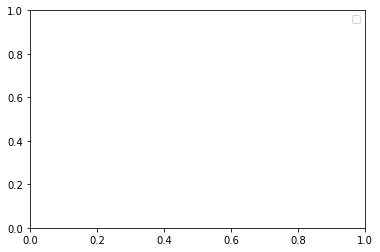

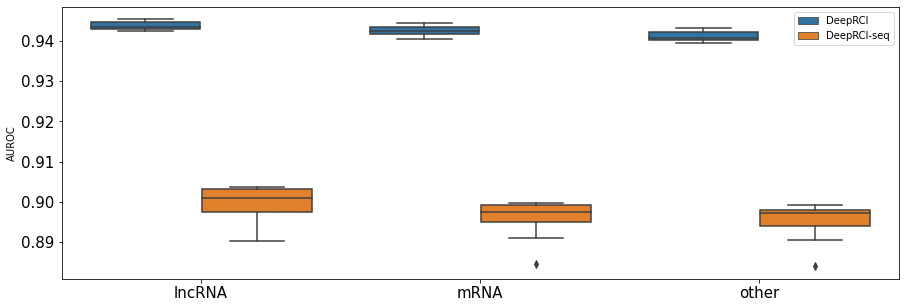

In [14]:
f, ax = plt.subplots()
plt.figure(figsize=(15,5))
g=sns.boxplot(y="AUROC", x="the type of RNA", hue="",
              data=data, )
g.set(xlabel=None)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title=None,
          handletextpad=0, columnspacing=1,
          loc="upper right", ncol=3, frameon=True)
ax.grid(False)
#ax.xaxis.grid(False)
#sns.despine(bottom=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)